In [33]:
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline 
plt.rcParams['figure.figsize'] = [16, 10]

import sys
sys.path.append('/Users/kai/src/psc/python')
import psc

In [91]:
step = 2000
length = [1, 50, 200]
corner = [0, -25, 0]
ds1 = xr.open_dataset(f"/Users/kai/src/psc/build-spack-ubuntu2/pfd.{step:09d}.bp", engine='pscadios2',
                      species_names=['e', 'i'],
                      length=length, corner=corner)
ds2 = xr.open_dataset(f"/Users/kai/src/psc/build-spack-ubuntu2/pfd_moments.{step:09d}.bp", engine='pscadios2', 
                      species_names=['e', 'i'],
                      length=length, corner=corner)
ds = xr.merge([ds1, ds2])
ds

<xarray.Dataset>
Dimensions:  (x: 1, y: 128, z: 512)
Coordinates:
  * x        (x) float64 0.0
  * y        (y) float64 -25.0 -24.61 -24.22 -23.83 ... 23.44 23.83 24.22 24.61
  * z        (z) float64 0.0 0.3906 0.7812 1.172 ... 198.4 198.8 199.2 199.6
Data variables: (12/35)
    jx_ec    (x, y, z) <class 'numpy.float32'> ...
    jy_ec    (x, y, z) <class 'numpy.float32'> ...
    jz_ec    (x, y, z) <class 'numpy.float32'> ...
    ex_ec    (x, y, z) <class 'numpy.float32'> ...
    ey_ec    (x, y, z) <class 'numpy.float32'> ...
    ez_ec    (x, y, z) <class 'numpy.float32'> ...
    ...       ...
    txx_i    (x, y, z) <class 'numpy.float32'> ...
    tyy_i    (x, y, z) <class 'numpy.float32'> ...
    tzz_i    (x, y, z) <class 'numpy.float32'> ...
    txy_i    (x, y, z) <class 'numpy.float32'> ...
    tyz_i    (x, y, z) <class 'numpy.float32'> ...
    tzx_i    (x, y, z) <class 'numpy.float32'> ...
Attributes:
    ib:       [0 0 0]
    im:       [  1 128 128]
    step:     2000
    time:     546.9029010739703

In [92]:
def plot_fields(fldnames, fld_kwargs=None):
    fig, axs = plt.subplots(len(fldnames), 1)
    if len(fldnames) == 1: axs = [axs]
    for i, fldname in enumerate(fldnames):
        fld = ds[fldname]
        if fld_kwargs:
            kwargs = fld_kwargs[i]
        else:
            kwargs = {}
        fld.plot(ax=axs[i], **kwargs)
        axs[i].set_aspect('equal')

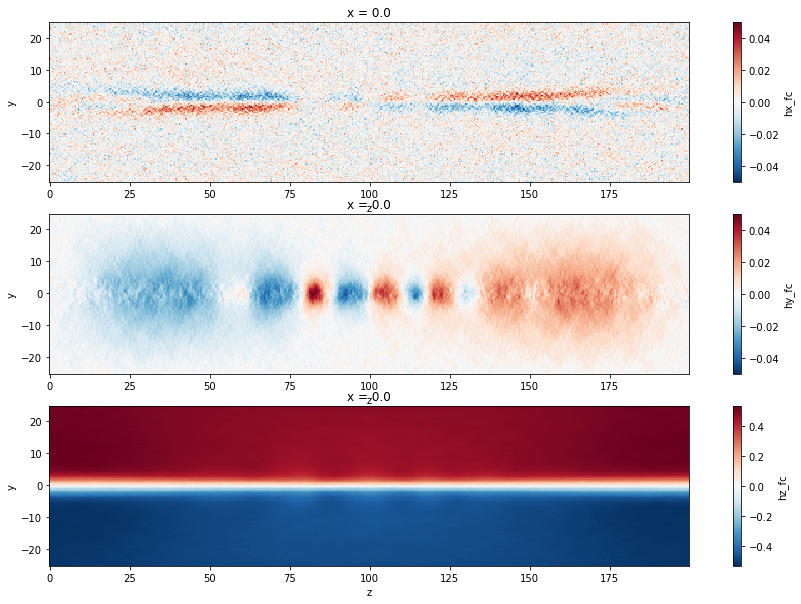

In [93]:
plot_fields(['hx_fc', 'hy_fc', 'hz_fc'])
#            fld_kwargs=[{"vmin": -.0065}, {"vmin": -.02}, {}])

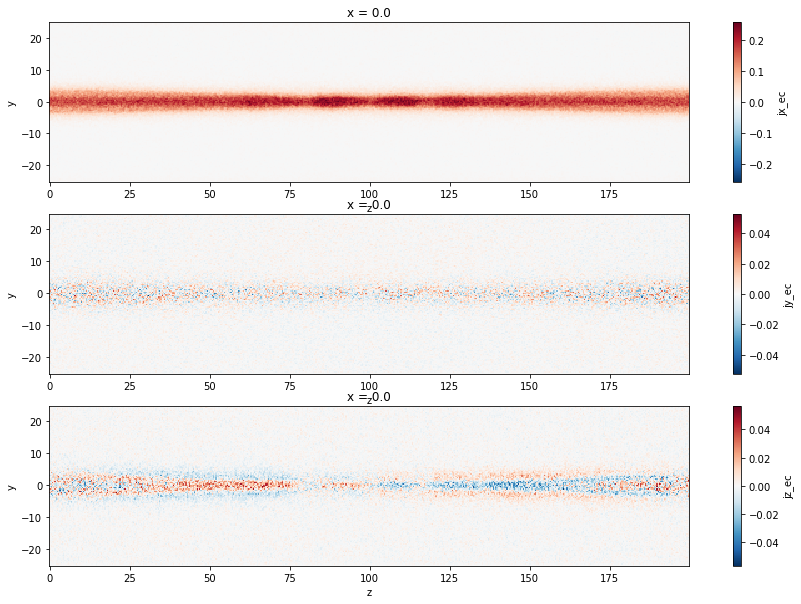

In [94]:
plot_fields(['jx_ec', 'jy_ec', 'jz_ec'])

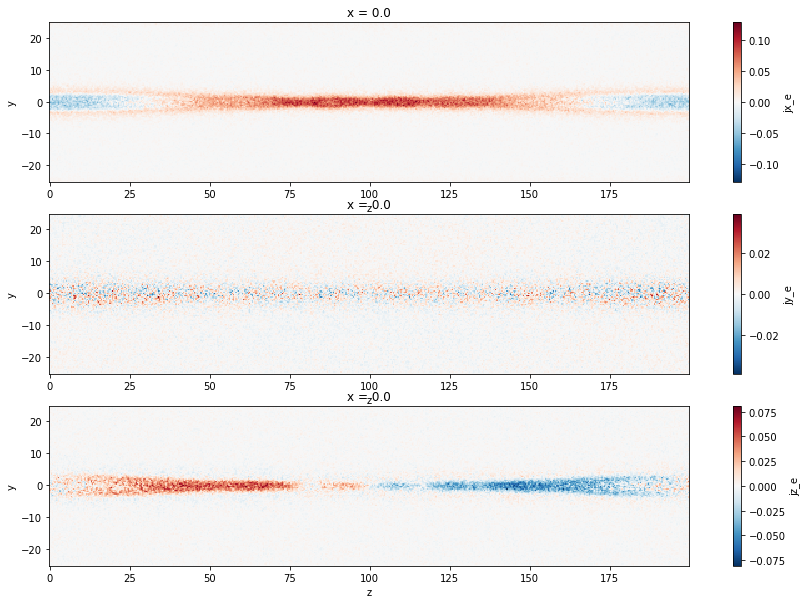

In [95]:
plot_fields(['jx_e', 'jy_e', 'jz_e'])

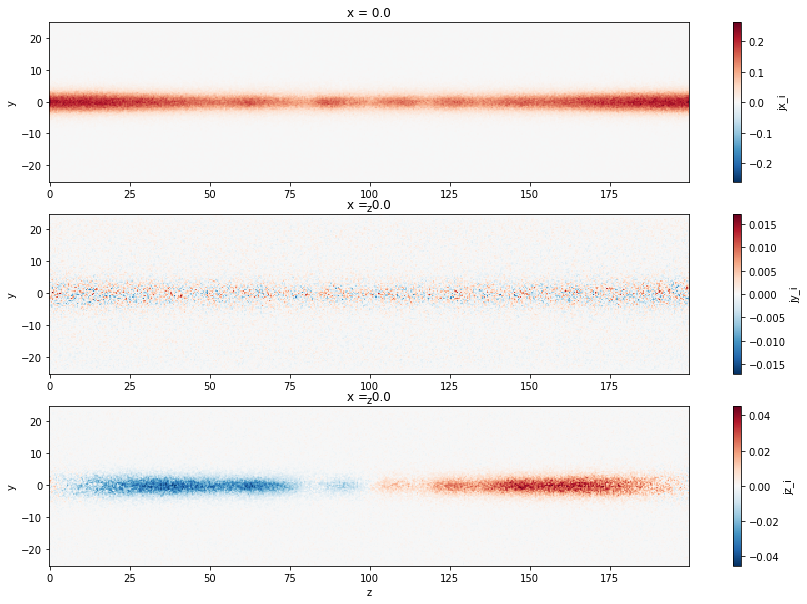

In [96]:
plot_fields(['jx_i', 'jy_i', 'jz_i'])

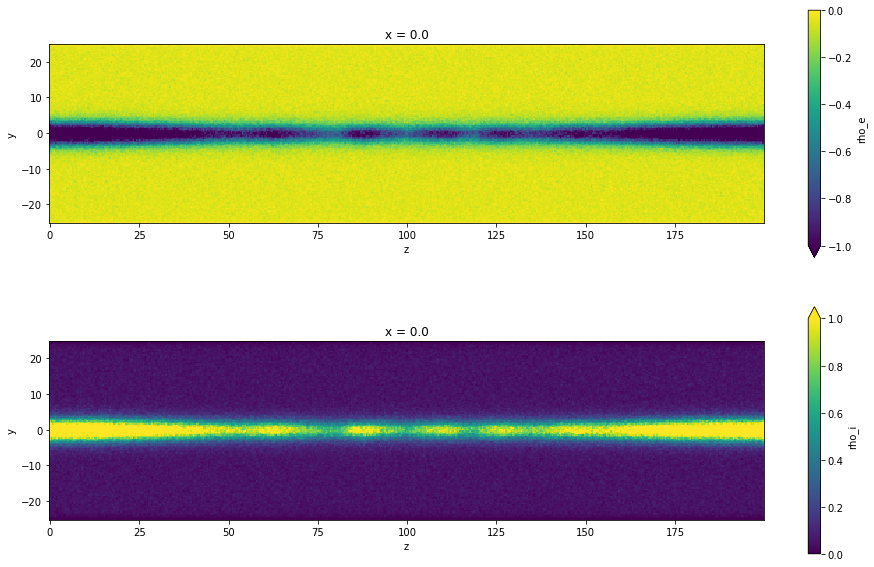

In [97]:
plot_fields(['rho_e', 'rho_i'], 
            fld_kwargs=[{"vmin": -1, "vmax": 0}, 
                        {"vmin": 0, "vmax": 1}])

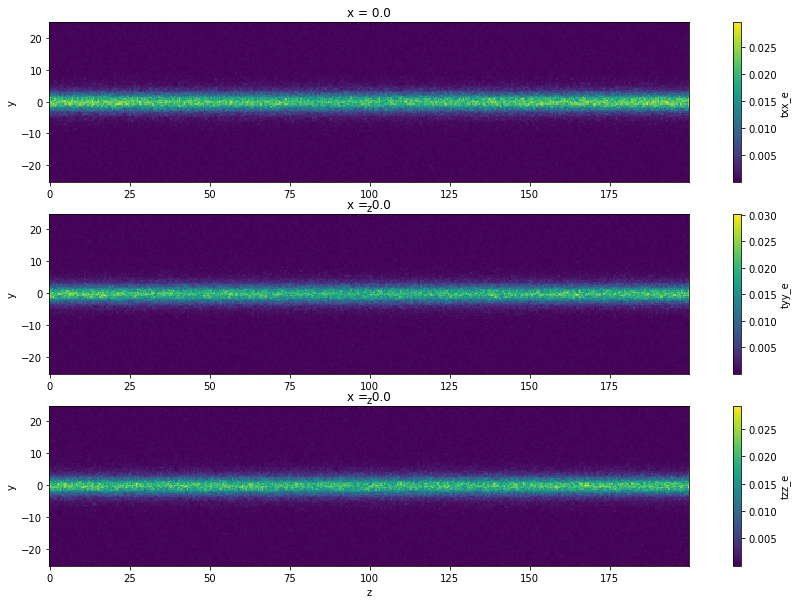

In [90]:
plot_fields(['txx_e', 'tyy_e', 'tzz_e'])

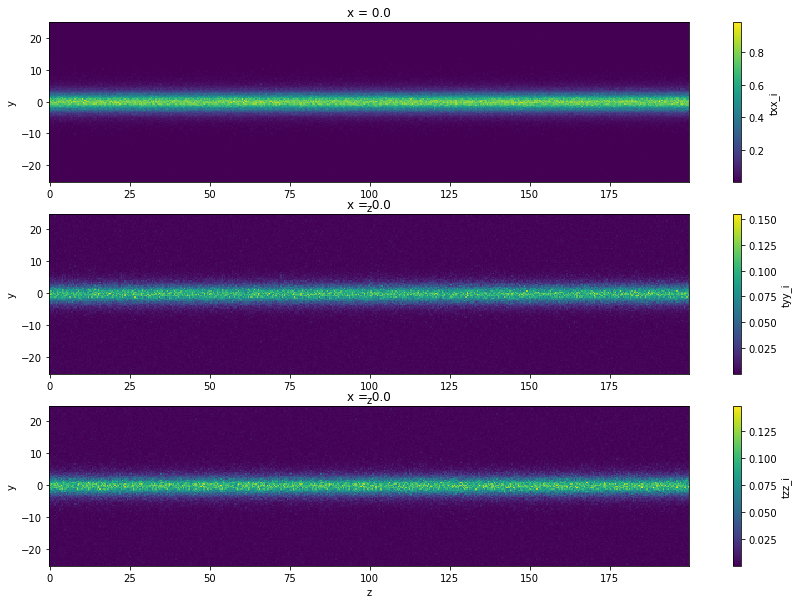

In [54]:
plot_fields(['txx_i', 'tyy_i', 'tzz_i'])